# Problem Set 2: FITS Files & Calibration Frames

<b>This assignment is to assist you in becoming familiar with the handling of fits files, a common 
astronomy data format (for both images and data tables) as well as with the basics of charge 
coupled device (CCD) data.</b>

For this assignment you can use whichever tool(s) you prefer - ds9, QFitsView, or astropy (or something else, if you prefer.) The description included has directions for ds9. 

By the end of this exercise, you should feel comfortable viewing and examining image data, understand the terminology we use to describe the data and the parts of the CCD, and begin to consider different causes of noise in data. 

This document is a list of directions and questions. Please turn in your answers on a separate PDF that is uploaded to Canvas. The PDF should include full written answers and any plots or screen grabs needed to justify your answers. Bold text are instructions. Italic text (also labeled with Q) are questions you should answer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Section 1: Examining Fits Files Using DS9

#### 1. Download the 4 necessary fits files from Canvas. 

First you are going to look at a flat field. Flat fields have been exposed to a source of light that 
illuminates the CCD (fairly) evenly across all the pixels. This helps us understand how individual 
pixels respond differently to similar stimulus. Understanding basic behavior of individual CCDs is 
important when we start to separate signal (the electrons that are generated from photons), from 
the noise.

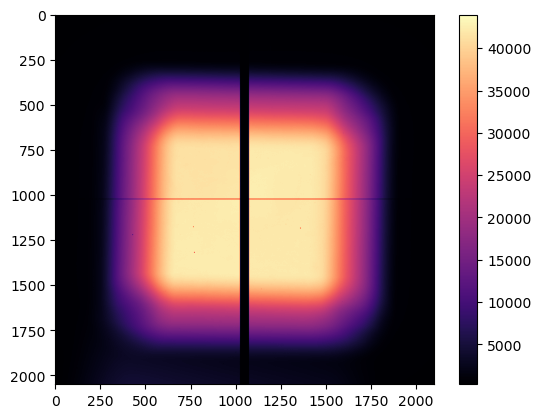

In [40]:
with fits.open('flat.0012.fits') as hdul:
    plt.imshow(hdul[0].data, cmap='magma')
    plt.colorbar()
    plt.show()

#### 2.  Display flat.0012.fits. Set the scaling so you can see more than a flat image (feel free to change the color range if you’d like.) 

Q1: We’re using data from ARCTIC, an imager on the APO 3.5m. If you correctly adjust your scale, you might find some surprising features in this “flat”. Is it flat? What makes it not flat? Describe what you see

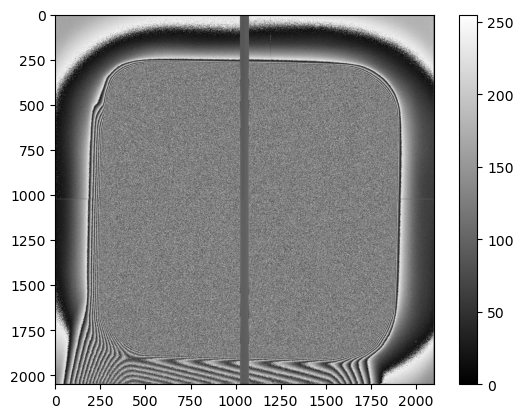

In [79]:
# Load the FITS file (closes automatically when done)
with fits.open('flat.0012.fits') as hdul: # param do_not_scale_image_data=True also works this way?
    hdul[0].scale('uint8', bscale=1, bzero=32768) #32768
    # Display the image data
    plt.imshow(hdul[0].data, cmap='grey')
    plt.colorbar()
    plt.show()

#### 3. Draw a test region. For this, we’ll use a box. Go to the “Region” menu, go down to shape, and select “Box”. Then draw a region on your chip.

#### 4.  Let’s examine what we can find out about the region you’ve selected. 

Under the “Region” menu, click on “Get Information”.  Explore under the “Analysis” menu. Can you make a histogram? Can you adjust its axes? Can you find a way to look at the statistics of the region? Can you figure out more than one way to see the standard deviation of your region?

Q2:  Measure at least three regions (at least one bias/overscan), and list them in data like the one below. The image regions should be ~10,000 pixels (area) - not giant, but not tiny. We want to have a good statistical sample.

Q3: Plot this histograms of at least one image and one overscan region. Play with the plot ranges to best display the 
similarities and differences. Include the plots in your response. Do either of them look familiar? Do they look similar 
or different? Describe them

Q4: Now open bias.0002.fits . This is also from ARCTIC but is a bias frame - it hasn’t been exposed to light. 
Measure several regions, but this time just change the size of the region. Collect the data in a table like the one 
below.

Q5:  Present the bias histograms and note how the histograms change from a small region to a large region. What do 
you think is happening with the distribution? Why? 


## Section 2: Headers